## The Sparks Foundation - GRIPSEP23¶

## Data Science and Business Analytics Intern

#### Target: From the given 'Iris' Dataset, Predict the optimum no. of clusters and represent it visually.

### Author: Muhammad Rauhan

### Importing Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

### Loading the Dataset

In [9]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Dataset Summary

In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


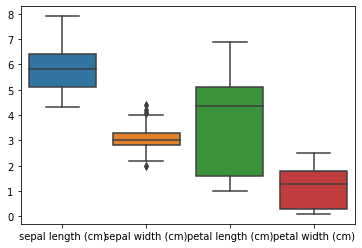

<Figure size 720x432 with 0 Axes>

In [11]:
sns.boxplot(data=iris_df)
plt.figure(figsize=(10,6))
plt.show()

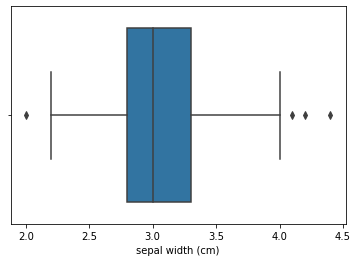

In [12]:
#finding outliers
sns.boxplot(data=iris_df, x='sepal width (cm)')
plt.show()

### Visualizing The Data

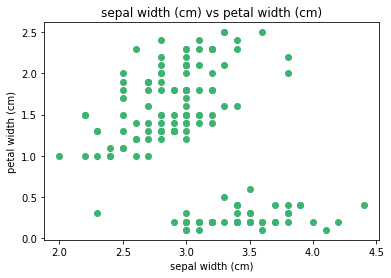

In [13]:
plt.scatter(data = iris_df, x="sepal width (cm)", y="petal width (cm)", c='mediumseagreen')
plt.title('sepal width (cm) vs petal width (cm)')  
plt.xlabel('sepal width (cm)')  
plt.ylabel('petal width (cm)')  
plt.show()

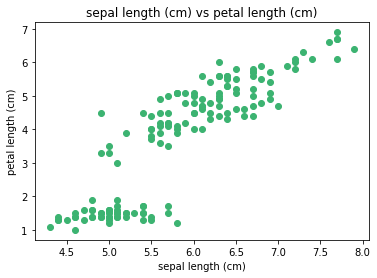

In [14]:
plt.scatter(data = iris_df, x="sepal length (cm)", y="petal length (cm)", c='mediumseagreen')
plt.title('sepal length (cm) vs petal length (cm)')  
plt.xlabel('sepal length (cm)')  
plt.ylabel('petal length (cm)')  
plt.show()

## Building The Model

### Assigning All Columns To x Value Without The Label Column (Species)

In [16]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

### Finding The Optimum No. of Clusters

Creating an Empty list to append the SSE(Sum of Squared Error) into it. Then, creating a For loop from 1 to 10 each time assign the value in **n_clusters** parameter. Lastly, fitting algorithm with features we have and append the inertia value(SSE) into the list.

In [17]:
sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

### All Values of SSE

In [18]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049,
 26.534529220779234]

### Determine The Best No. of Clusters By Plotting The Line Plot

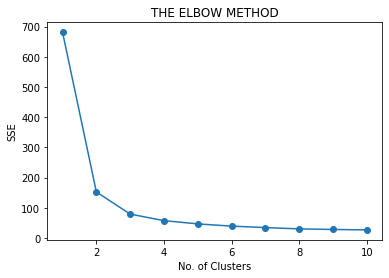

In [19]:
plt.plot(range(1,11), sse, marker='o')
plt.title('THE ELBOW METHOD')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE') #Cluster Sum of Squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs.
From this we choose the no. of clusters as **3**.

### Initializing The K-Means Algorithm

In [20]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

predict = model.fit_predict(x) #fitting & predicting on training data

In [22]:
#Prediction Result

pd.DataFrame(predict)

,0
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,2
147,0
148,0


### Centroids (The Center Points of Each Cluster) Values

In [23]:
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### Output

1. Creating a Scatter Plot of Data Points That Belong To Cluster 0 (Predicted By Kmeans).
    - c='---' sets the color of the points.
    - s=100 sets the size of the points to 100.
    - label='iris-setosa' sets the label for the cluster in the legend.


2. Same For Cluster 1 and Cluster 2 as well.
    - But thing is label='----' should differ from one another.


3. plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
    - This line adds black points to the plot to represent the cluster centroids.

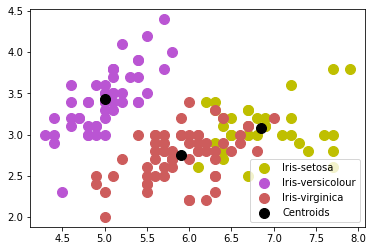

In [26]:
# Visualising the clusters - On the first two columns
plt.scatter(x[predict == 0, 0], x[predict == 0, 1], s = 100, c = 'y', label = 'Iris-setosa')
plt.scatter(x[predict == 1, 0], x[predict == 1, 1], s = 100, c = 'mediumorchid', label = 'Iris-versicolour')
plt.scatter(x[predict == 2, 0], x[predict == 2, 1], s = 100, c = 'indianred', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()